## **INSTALISASI LIBRARY**

Library Seaborn ini digunakan untuk menampilkan data dengan tujuan analisis

In [ ]:
pip install seaborn

Sedangkan untuk library pandas digunakan untuk mengolah data. Dan untuk numpy digunakan untuk perhitungan data secara matematis (dalam matriks)

In [ ]:
pip install pandas numpy

Import file penting dan sediakan data

# **PREPROCESSING DATA**

pada tahapan ini kita akan melakukan analisa pada data dan mengolah data

## **MENYIAPKAN DATA**

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/citrus.csv")

df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


---
<center style="color:red"><b>PENJELASAN</b></center>

---


-> `import pandas as pd`

-> `import seaborn as sns`

kode tersebut adalah import, dimana tujuannya agar **dapat menggunakan library** tersebut

-> `df = pd.read_csv(
  \__path\__)`

kode tersebut merupakan **pengambilan data** dalam bentuk csv agar bisa digunakan dan di simpan dalam kode python dalam variable **df**. Untuk \__path\__ sendiri bisa disesuaikan dengan directory data nya

-> `df.head()`

kode tersebut digunakan untuk **menampilkan 5 data teratas** (secara defaulth). Kamu bisa merubahnya untuk menampilkan berapapun banyak data teratas. Misal kamu ingin menampilkan 7 data teratas, maka kamu harus merubahnya menjadi `df.head(7)`


---



## **FORMAT DATA**

In [ ]:
df["name"].unique()

array(['orange', 'grapefruit'], dtype=object)

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.Gender.unique` kita mencoba melihat apakah ada **data yang formatnya berbeda atau tidak**.

---

## **DATA OUTLIERS**

<Axes: ylabel='diameter'>

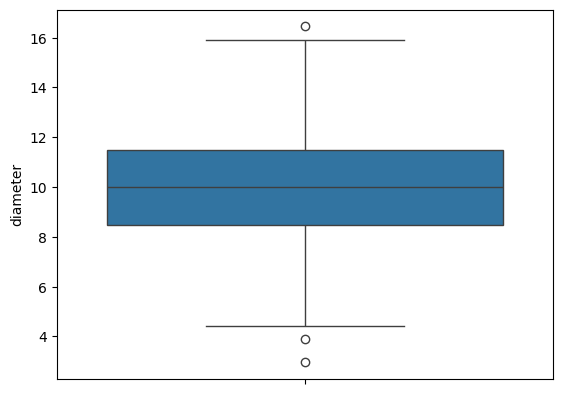

In [ ]:
sns.boxplot(df["diameter"])

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `sns.boxplot(df["diameter"])` kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh data *diameter*. Dari hasil yang di atas, kita dapat melihat **terdapat outliers** di bawah persegi (**lingkarang pada titik y di bawah 5 dan mendekati 4**) dan di atas titik y 16.

---

<Axes: ylabel='weight'>

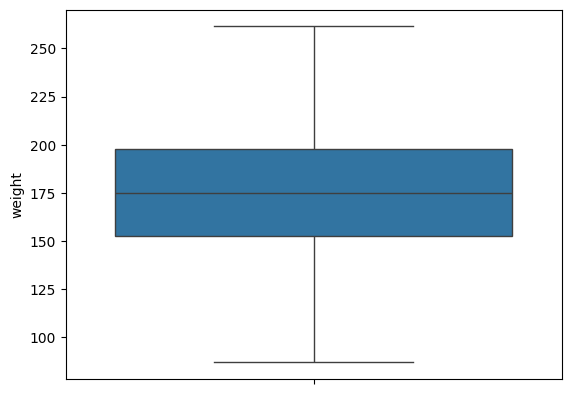

In [ ]:
sns.boxplot(df["weight"])

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `sns.boxplot(df["weight"])` kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh data *berat*. Dari hasil yang di atas, kita dapat melihat bahwa **tidak terdapat outlier** atau lingkaran dalam grafik tersebut. Seluruh data melalui penyebaran yang sesuai.

---

<Axes: ylabel='diameter'>

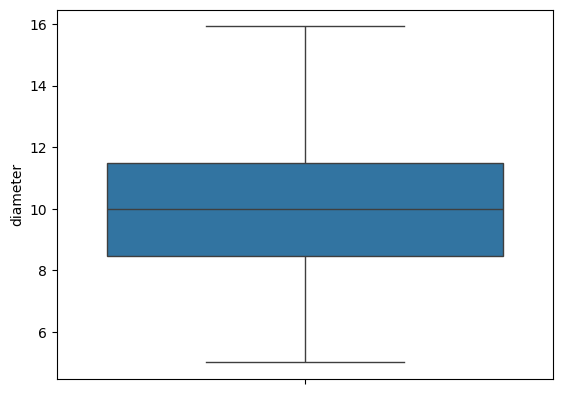

In [ ]:
df = df[(df["diameter"]<16) & (df["diameter"]>5)]

sns.boxplot(df["diameter"])

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df = df[(df["diameter"]<16) & (df["diameter"]>5)]` kita coba **menghilangkan outlier** yang telah kita temukan sebelumnya yaitu di atas angka 16 dan di bawah 5. `(df["diameter"]<16)` itu maknanya *semua data yang mana umurnya di bawah 16*. `(df["diameter"]>5)` itu maknanya *semua data yang mana umurnya di atas 5*. `df = ` artinya kita akan menimpa data yang lama (yang ada outliers) dengan yang baru yaitu `df[(df["diameter"]<16) & (df["diameter"]>5)]` yang sudah dihilangkan outliernya.

---

## **DATA DUPLIKASI**

In [ ]:
df[df.duplicated()]

,name,diameter,weight,red,green,blue


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df[df.duplicated()]` kita mencoba melihat apakah **ada data yang terduplikasi atau tidak**. Dari hasil tersebut, kita dapat melihat kalau **tidak ada data yang terduplikasi**. Maka kita bisa langsung pada tahapan selanjutnya. Jika ada duplikasi maka kita bisa gunakan kode `df.drop_duplicates(inplace=True)` untuk menghilangkan duplikasi

---

<center><h2><b>DATA KOSONG</b></h2></center>

In [ ]:
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.isna().sum()` kita akan melihat dari data tersebut apakah `ada data kosong atau tidak`. Dari hasil diatas tidak terdapat data yang kosong. Maka kita bisa lanjut ke tahapan selanjutnya. `df.isna()` artinya kita akan melihat untuk apakah suatu data itu kosong atau tidak. `.sum()` digunakan untuk menghitung berapa banyak data untuk setiap kolom yang hilang.

---

---
<center style="color:red"><b>CARA MENANGANI DATA KOSONG</b></center>

---
terdapat berbagai cara untuk menangani data kosong.
1. bisa mencari nilai mean dari kolomnya (biasanya untuk bilangan kontinue / float)
2. bisa mencari nilai modus dari kolomnya (biasanya untuk  kategorikal / bil. diskrit / int )
3. bisa menghapusnya (jika datanya itu banyak, dan yang kosong itu sedikit)

---

# **MODELING**

pada tahapan ini kita akan melakukan training model dan evaluasi

## **IMPORT LIBRARY**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


,diameter,weight,red,green,blue
2962,8.77,157.10,160,87,9
7810,11.65,200.46,135,72,2
1317,7.71,140.89,146,73,12
2607,8.55,153.45,164,75,2
3546,9.15,163.10,166,74,11
...,...,...,...,...,...
5753,10.19,177.28,155,71,2
5210,9.36,163.58,152,70,27
5409,9.74,170.57,167,72,25
879,7.31,135.40,165,77,4


---
<center style="color:red"><b>PENJELASAN</b></center>

---
fungsi dari library
- train_test_split -> untuk memisahkan *data train* dan *data test*
- classification_report -> untuk melihat dari hasil evaluasi model
- KNeighborsClassifier -> untuk mengakses model *knn* yang sudah pernah dibuat
- DecisionTreeClassifier -> untuk mengakses model *decision tree* yang sudah pernah dibuat
- RandomForestClassifier -> untuk mengakses model *random forest* yang sudah pernah dibuat
- LogisticRegression -> untuk mengakses model *logistic regression* yang sudah pernah dibuat
- SVC -> untuk mengakses model *svm* yang sudah pernah dibuat

---

## **DATA SPLIT**

In [ ]:
X = df.drop(columns="name")
y = df.name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `X = df.drop(columns="name")` dimana kita telah menentukan *data x (data input)* dengan mengambil seluruh data kecuali *labelnya (data output)*. Lalu untuk kode `y = df.name` kita mengambil data labelnya saja / *data output*. Untuk kode ini `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)` kita memisahkan antara *data train* dan *data test*. Data yang sudah di split / dipisahkan inilah akan digunakan untuk training dan evaluation.

---

## **MODEL TRAINING AND EVALUATION**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.92      0.91      0.91       998
      orange       0.91      0.92      0.91       998

    accuracy                           0.91      1996
   macro avg       0.91      0.91      0.91      1996
weighted avg       0.91      0.91      0.91      1996



---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `knn = KNeighborsClassifier()` dimana kita telah akan menaruh akses knn di variable knn. Untuk kode `knn.fit(X_train, y_train)` bertujuan untuk melatih modelnya dengan data latih / data train yang sudah kita split sebelumnya. Lalu untuk kode `y_pred = knn.predict(X_test)` dimana kita ingin mengambil data yang diprediksi model kita dengan menggunakan data test. Tujuannya adalah untuk mengetahui performa dari model kita. Lalu untuk kode `print(classification_report(y_test, y_pred))` bertujuan untuk menampilkan hasil performa dari model yang dilatih dengan menggunakan algoritma knn.

---

---
<center style="color:red"><b>HASIL PERFORMA</b></center>

---
Terlihat jika model dilatih dengan menggunakan algoritma knn akan menghasilkan akurasi 91%. Terlihat cukup besar, tetapi kita perlu melihat model yang lain, guna untuk mendapatkan hasil akurasi terbaik.

---

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.94      0.94      0.94       998
      orange       0.94      0.94      0.94       998

    accuracy                           0.94      1996
   macro avg       0.94      0.94      0.94      1996
weighted avg       0.94      0.94      0.94      1996



---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `decision_tree = DecisionTreeClassifier()` dimana kita telah akan menaruh akses decision tree di variable decision_tree. Untuk kode `decision_tree.fit(X_train, y_train)` bertujuan untuk melatih modelnya dengan data latih / data train yang sudah kita split sebelumnya. Lalu untuk kode `y_pred = decision_tree.predict(X_test)` dimana kita ingin mengambil data yang diprediksi model kita dengan menggunakan data test. Tujuannya adalah untuk mengetahui performa dari model kita. Lalu untuk kode `print(classification_report(y_test, y_pred))` bertujuan untuk menampilkan hasil performa dari model yang dilatih dengan menggunakan algoritma decision tree.

---

---
<center style="color:red"><b>HASIL PERFORMA</b></center>

---
Terlihat jika model dilatih dengan menggunakan algoritma decision tree akan menghasilkan akurasi 94%. Terlihat lebih besar dari akurasi dengan knn, tetapi kita perlu melihat model yang lain, guna untuk mendapatkan hasil akurasi terbaik.

---

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.95      0.97      0.96       998
      orange       0.97      0.95      0.96       998

    accuracy                           0.96      1996
   macro avg       0.96      0.96      0.96      1996
weighted avg       0.96      0.96      0.96      1996



---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `random_forest = RandomForestClassifier()` dimana kita telah akan menaruh akses random forest di variable random_forest. Untuk kode `random_forest.fit(X_train, y_train)` bertujuan untuk melatih modelnya dengan data latih / data train yang sudah kita split sebelumnya. Lalu untuk kode `y_pred = random_forest.predict(X_test)` dimana kita ingin mengambil data yang diprediksi model kita dengan menggunakan data test. Tujuannya adalah untuk mengetahui performa dari model kita. Lalu untuk kode `print(classification_report(y_test, y_pred))` bertujuan untuk menampilkan hasil performa dari model yang dilatih dengan menggunakan algoritma random forest.

---

---
<center style="color:red"><b>HASIL PERFORMA</b></center>

---
Terlihat jika model dilatih dengan menggunakan algoritma random forest akan menghasilkan akurasi 96%. Terlihat akurasinya paling besar dari sebelumnya, tetapi kita perlu melihat model yang lain, guna untuk mendapatkan hasil akurasi terbaik.

---

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.94      0.96      0.95       998
      orange       0.96      0.93      0.95       998

    accuracy                           0.95      1996
   macro avg       0.95      0.95      0.95      1996
weighted avg       0.95      0.95      0.95      1996



---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `logistic_regression = LogisticRegression()` dimana kita telah akan menaruh akses logistic regression di variable logistic_regression. Untuk kode `logistic_regression.fit(X_train, y_train)` bertujuan untuk melatih modelnya dengan data latih / data train yang sudah kita split sebelumnya. Lalu untuk kode `y_pred = logistic_regression.predict(X_test)` dimana kita ingin mengambil data yang diprediksi model kita dengan menggunakan data test. Tujuannya adalah untuk mengetahui performa dari model kita. Lalu untuk kode `print(classification_report(y_test, y_pred))` bertujuan untuk menampilkan hasil performa dari model yang dilatih dengan menggunakan algoritma logistic regression.

---

---
<center style="color:red"><b>HASIL PERFORMA</b></center>

---
Terlihat jika model dilatih dengan menggunakan algoritma logistic regression akan menghasilkan akurasi 95%. Terlihat akurasinya besar tapi tidak lebih besar dari random forest.

---

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  grapefruit       0.93      0.92      0.92       998
      orange       0.92      0.93      0.92       998

    accuracy                           0.92      1996
   macro avg       0.92      0.92      0.92      1996
weighted avg       0.92      0.92      0.92      1996



---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode ini `svm = SVC()` dimana kita telah akan menaruh akses svm di variable svm. Untuk kode `svm.fit(X_train, y_train)` bertujuan untuk melatih modelnya dengan data latih / data train yang sudah kita split sebelumnya. Lalu untuk kode `y_pred = svm.predict(X_test)` dimana kita ingin mengambil data yang diprediksi model kita dengan menggunakan data test. Tujuannya adalah untuk mengetahui performa dari model kita. Lalu untuk kode `print(classification_report(y_test, y_pred))` bertujuan untuk menampilkan hasil performa dari model yang dilatih dengan menggunakan algoritma svm.

---

---
<center style="color:red"><b>HASIL PERFORMA</b></center>

---
Terlihat jika model dilatih dengan menggunakan algoritma svm akan menghasilkan akurasi 92%. Terlihat akurasinya besar tapi tidak lebih besar dari random forest.

---